# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot(df):
    # diferenciar entre clase 0 y clase 1
    c0 = df[df['output']==0]
    c1 = df[df['output']==1]

    xs0 = [e[0] for e in c0['input']]
    ys0 = [e[1] for e in c0['input']]


    xs1 = [e[0] for e in c1['input']]
    ys1 = [e[1] for e in c1['input']]

    plt.scatter(xs0, ys0, color='limegreen', alpha=0.5)
    plt.scatter(xs1, ys1, color='red', alpha=0.5)
    plt.show()

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [3]:
def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

diagonales(1000, 2, 0.75)

,input,output
0,"[-1.0943042845789785, -3.122474934450843]",0
1,"[-0.39771270045305873, -2.5764976477085497]",0
2,"[-3.0260547930188375, -3.5554455318454745]",0
3,"[-1.4795163352583622, 0.18514686317711315]",0
4,"[-1.1522879055767037, 0.7625052794920923]",0
...,...,...
995,"[0.6329521934661717, 1.6416299254330742]",1
996,"[0.4791545469581402, 1.6400145485907927]",1
997,"[0.6740569774291082, 1.8913536961038482]",1
998,"[1.00021103513014, -0.05264493817522231]",1


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

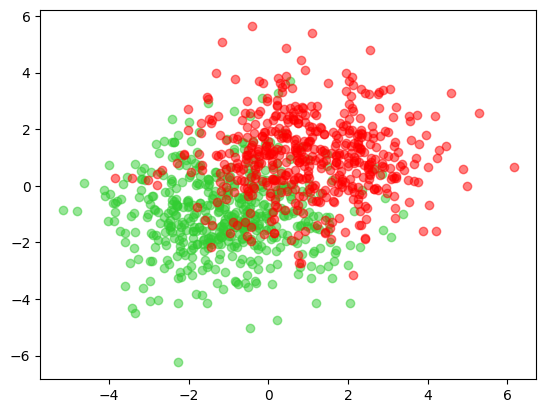

In [4]:
plot(diagonales(1000, 2, 1))

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

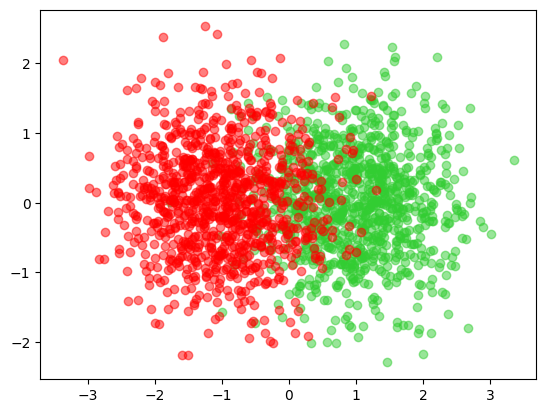

In [5]:
def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

par_df = paralelas(2000, 2, 0.75)

plot(par_df) 

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

### Determinar lugar de clase 0
Son los $\rho$ que cumplen $0\leq \rho \leq 1$.

Para el $\theta$, se puede obtener que para los extremos:

$\theta = 4\pi\rho \lor \theta=4\pi\rho-\pi$
 
Por lo que se puede hacer variar un valor $a$ entre $[0,1]$ para obtener que

$\theta = 4\pi\rho-a\pi$

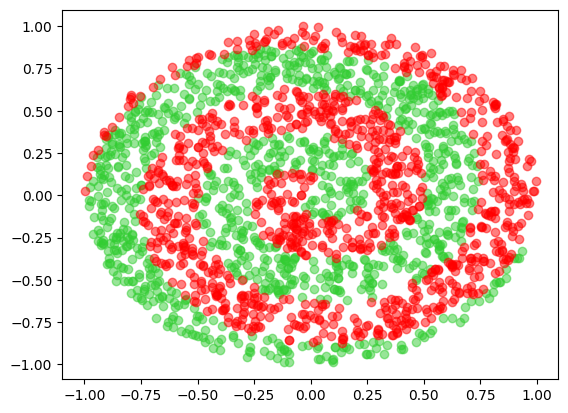

In [ ]:
# Primero determino el lugar geometrico de los puntos de clase 0
# 0 <= r0 <= 1
# r0 = theta/4pi => theta = 4pi*r0
# r0 = (theta+pi)/4pi => theta = 4*pi*r0 - pi

# 4*pi*r0 - pi <= theta <= 4*pi*r0
# -pi <= theta-4*pi*r0 <= 0


# Para el caso de r1
# 0 <= r1 <= 1
# theta <= 4*pi*r1 - pi o 4*pi*r1 <= theta

# Para la primera sección
# theta <= pi*(4*r1-1)


# Para la segunda sección
# 4*pi*r1 <= theta 

#### PASO A COORDENADAS CARTESIANAS ####
# r0
# theta = 4*pi*r0 - a*pi
# r0 = (theta + a*pi)/4pi
# x = (theta + a*pi)/4pi * cos(theta)
 
def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

plot(espirales(1000))
